# Dogs of Zürich

In [1]:
# Import relevant libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Load the data
dogs17 = pd.read_csv('20170308hundehalter.csv', index_col=0)
dogs17.head()

,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
HALTER_ID,,,,,,,,,,,,
126,61-70,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
171,61-70,m,3.0,31.0,Berner Sennenhund,NaN,NaN,NaN,I,2009,m,tricolor
574,61-70,w,2.0,23.0,Mischling gross,NaN,NaN,NaN,I,2013,w,schwarz
695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz


In [3]:
dogs17.RASSE1_MISCHLING.unique()

array([nan, 'Mischling'], dtype=object)

In [4]:
dogs17.RASSE2_MISCHLING.unique()

array([nan])

In [5]:
# translate column names from German to English
dogs17.rename({'ALTER': 'Age', 'GESCHLECHT': 'Gender', 'STADTKREIS': 'District', 'RASSE1': 'Breed1', 'RASSE2': 'Breed2', 'GEBURTSJAHR_HUND': 'BirthYear_Dog', 'GESCHLECHT_HUND': 'Gender_Dog', 'HUNDEFARBE': 'Color_Dog', 'RASSE1_MISCHLING': 'Mixed Breed', 'RASSENTYP':'Breed Type', 'STADTQUARTIER': 'City Quarter'}, axis='columns', inplace=True)

In [6]:
dogs17.head()

,Age,Gender,District,City Quarter,Breed1,Mixed Breed,Breed2,RASSE2_MISCHLING,Breed Type,BirthYear_Dog,Gender_Dog,Color_Dog
HALTER_ID,,,,,,,,,,,,
126,61-70,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
171,61-70,m,3.0,31.0,Berner Sennenhund,NaN,NaN,NaN,I,2009,m,tricolor
574,61-70,w,2.0,23.0,Mischling gross,NaN,NaN,NaN,I,2013,w,schwarz
695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz


In [7]:
# drop column with all NAN
dogs17.drop('RASSE2_MISCHLING', axis=1, inplace=True)

In [8]:
# replace values - 1 for mixed breed, 0 for pure breed
dogs17['Mixed Breed'].replace(to_replace='Mischling', value=1, inplace=True)
dogs17['Mixed Breed'] = dogs17['Mixed Breed'].fillna(0)
dogs17['Mixed Breed'].unique()

array([0., 1.])

In [9]:
dogs17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7155 entries, 126 to 135731
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            7154 non-null   object 
 1   Gender         7155 non-null   object 
 2   District       7154 non-null   float64
 3   City Quarter   7154 non-null   float64
 4   Breed1         7155 non-null   object 
 5   Mixed Breed    7155 non-null   float64
 6   Breed2         543 non-null    object 
 7   Breed Type     7155 non-null   object 
 8   BirthYear_Dog  7155 non-null   int64  
 9   Gender_Dog     7155 non-null   object 
 10  Color_Dog      7155 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 670.8+ KB


In [10]:
# replace NaN values - no secondary breed for purebred dogs 
dogs17['Breed2'] = dogs17['Breed2'].fillna('None')

In [12]:
# drop rows with missing data
dogs17 = dogs17.dropna()

In [13]:
dogs17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7154 entries, 126 to 135731
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            7154 non-null   object 
 1   Gender         7154 non-null   object 
 2   District       7154 non-null   float64
 3   City Quarter   7154 non-null   float64
 4   Breed1         7154 non-null   object 
 5   Mixed Breed    7154 non-null   float64
 6   Breed2         7154 non-null   object 
 7   Breed Type     7154 non-null   object 
 8   BirthYear_Dog  7154 non-null   int64  
 9   Gender_Dog     7154 non-null   object 
 10  Color_Dog      7154 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 670.7+ KB


In [15]:
dogs17['Age'].unique()

array(['61-70', '41-50', '51-60', '71-80', '81-90', '31-40', '91-100',
       '21-30', '11-20'], dtype=object)

In [16]:
dogs17['District'].unique()

array([ 9.,  3.,  2.,  6.,  7., 10., 11.,  8.,  5.,  4., 12.,  1.])

## How old were dog owners in Zurich in 2017?

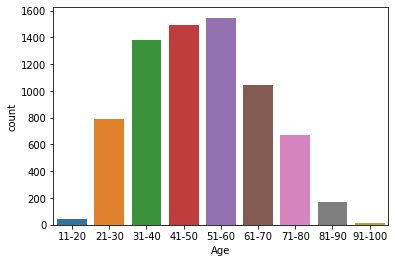

In [21]:
sns.countplot(x = 'Age', order=['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'], data = dogs17)
plt.show()

## How does dog age and owner age compare?

In [27]:
dogs17['Dog Age']=2017 - dogs17.BirthYear_Dog

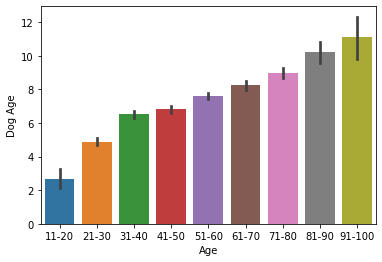

In [33]:
sns.barplot(x = 'Age', y = 'Dog Age', order=['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'], data=dogs17)
plt.show()

## What is the most dog friendly district in Zurich in 2017?

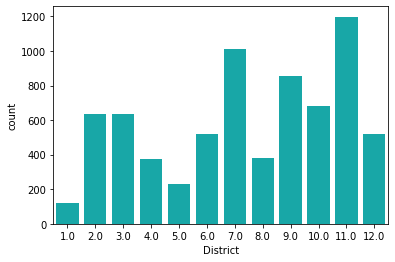

In [35]:
sns.countplot(x = 'District', color='c', data=dogs17)
plt.show()